In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config Inlinebackend.figureformat='retina'

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Checking the shape of data_set
dataset.shape

(10000, 14)

In [4]:
# splitting the dataset into dependent and independent variables
y = dataset.pop("Exited")
X = dataset

In [5]:
X.shape, y.shape

((10000, 13), (10000,))

In [6]:
X.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
# Dropping unnecessary columns
X.drop(columns=["RowNumber","CustomerId","Surname"], inplace =True)

In [9]:
X.shape

(10000, 10)

In [10]:
cat_cols = X.select_dtypes(["object"])
for i in cat_cols.columns:
    dummy = pd.get_dummies(X[i], drop_first=True)
    X = pd.concat([X,dummy], axis=1)
    X = X.drop(columns=i)

In [11]:
X.shape

(10000, 11)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
print("trainning and test independent variables size:" f"{X_train.shape, X_test.shape}")
print("trainning and test dependent variables size:" f"{y_train.shape, y_test.shape}")

trainning and test independent variables size:((8000, 11), (2000, 11))
trainning and test dependent variables size:((8000,), (2000,))


In [14]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [15]:
# Creating ANN
# Importing important libraries
import keras
from keras.models import Sequential #Responsible for creating the model
from keras.layers import Dense # Used while creating the hidden layers 
from keras.layers import Dropout # Regularization parameter
from keras.layers import ReLU, LeakyReLU, ELU, PReLU # Activation functions

In [16]:
# Initializing the model
classifier = Sequential()

# Creating the first hidden layer with 6 neurons in it, and Input features are 11 in the dataset
classifier.add(Dense(units=6, # neurons in first hiddel layer 
                     kernel_initializer= 'he_uniform', # weight initialization technique he_uniform as it usually preferred with relu 
                     activation="relu", # for activating neurons
                     input_dim=11)) # number of input features x1,x2......x11

# Creating the second hidden layer with 6 neurons in it.
classifier.add(Dense(units=6, # neurons in first hiddel layer 
                     kernel_initializer= 'he_uniform', # weight initialization technique he_uniform as it usually preferred with relu 
                     activation="relu")) # for activating neurons

# Creating the output layer
classifier.add(Dense(units=1, # as the output layer will have only one neuron to give binary classifiation
                    kernel_initializer="glorot_uniform", # weight initializer goes with sigmoid
                    activation='sigmoid')) # for binary calssification

In [17]:
# This shows the model summary, which as 6 as number of nuerons and param as the number of trainable parameters
# First desnse layer will have 6 x 11 (weighs) + 6 (bias) = 72 trainable parameters
# Second layer will have 6 x 6 (weighs) + 6 (bias) = 42 trainable parameters
# Second layer will have 6 x 1 (weighs) + 1 (bias) = 7 trainable parameters
# Total trainable parameters = 72 + 42 + 7 = 121
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compiling the model
classifier.compile(optimizer="adam", # mostly used, combination of RMS prop and momentum
                  loss= "binary_crossentropy", # used for binary classification
                  metrics= ['accuracy']) # checking model accuracy 
model_history = classifier.fit(X_train,y_train, validation_split=0.33, batch_size= 10, epochs=100)
# Number of iterations will be 5360/10 per epochs

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5886 - accuracy: 0.7348 - val_loss: 0.4699 - val_accuracy: 0.7929
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4551 - accuracy: 0.7975 - val_loss: 0.4371 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4300 - accuracy: 0.7986 - val_loss: 0.4213 - val_accuracy: 0.7989
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4122 - accuracy: 0.8120 - val_loss: 0.4103 - val_accuracy: 0.8080
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4018 - accuracy: 0.8094 - val_loss: 0.4016 - val_accuracy: 0.8118
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3903 - accuracy: 0.8151 - val_loss: 0.3925 - val_accuracy: 0.8160
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3692 - accuracy: 0.8335 - val_loss: 0.3900 - val_accuracy: 0.8175

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3443 - accuracy: 0.8581 - val_loss: 0.3591 - val_accuracy: 0.8573
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3151 - accuracy: 0.8712 - val_loss: 0.3560 - val_accuracy: 0.8588
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3386 - accuracy: 0.8550 - val_loss: 0.3568 - val_accuracy: 0.8584
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3246 - accuracy: 0.8668 - val_loss: 0.3567 - val_accuracy: 0.8584
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3290 - accuracy: 0.8674 - val_loss: 0.3563 - val_accuracy: 0.8595
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3265 - accuracy: 0.8647 - val_loss: 0.3572 - val_accuracy: 0.8588
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3127 - accuracy: 0.8753 - val_loss: 0.3566 - val_accuracy:

In [28]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


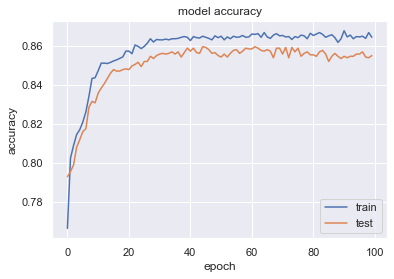

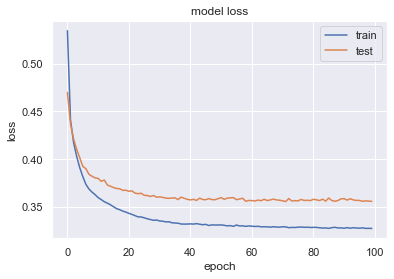

In [40]:
# summarizing and plotting history for accuracy
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
# plt.plot(model_history.history["loss"])
# plt.plot(model_history.history["val_loss"])
plt.title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["train","test"], loc="best")
plt.show()

# summarizing and plotting history for loss
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(["train","test"], loc="best")
plt.show()

In [47]:
# Making the predictions and evaluating the model
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5 # will show true or false

In [57]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print(f"Confusuin matrix:")
print(f"{confusion_matrix(y_test,y_pred)}")

print(f"Accuracy score:")
print(f"{accuracy_score(y_test,y_pred)*100}%")

Confusuin matrix:
[[1510   85]
 [ 192  213]]
Accuracy score:
86.15%
